<a href="https://colab.research.google.com/github/Megacity1/ML-ASSESSMENT/blob/main/Macine_Learning_Assessment(logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#importing the dataset
df= pd.read_csv('https://raw.githubusercontent.com/Megacity1/ML-ASSESSMENT/main/weatherAUS.csv')

In [3]:
#attaining the first 10 rows of the dataset
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
#statistical description of the dataset 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
#knowing the columns 
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
#attaining the unique values 
df.nunique( )

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [7]:
#information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

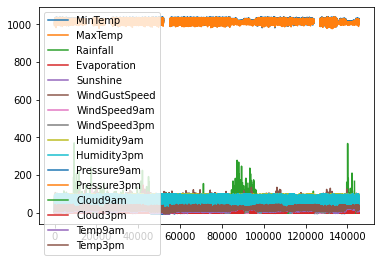

In [8]:
#plotting the dataset 
df.plot()

In [9]:
#lowering the columns name into small letters
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [10]:
#spliting the time in terms of year month and day
df['date'] = pd.to_datetime(df['date']) # parse as datatime
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [11]:
df[['date', 'Year', 'Month', 'Day']] # preview changes made

df.drop('date', axis=1, inplace = True)
df.info()

df = df

df.isnull().sum()

missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 non-null

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [12]:
#dropping the columns 
df=df.drop(['sunshine','evaporation','cloud3pm','cloud9am'], axis=1)

missing

df.dropna(how='all', subset=['raintomorrow'], inplace=True)

df

num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

df.head()

cat_col=df.select_dtypes(object).columns.tolist()
len(cat_col)

df=df.drop(['rainfall'], axis=1)
num_col
num_col.remove('rainfall')

In [13]:
#imputing the median values where needed
median_values = df[num_col].median()
df[num_col] = df[num_col].fillna(value=median_values)

In [14]:
#label encoding for the catagorical data
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

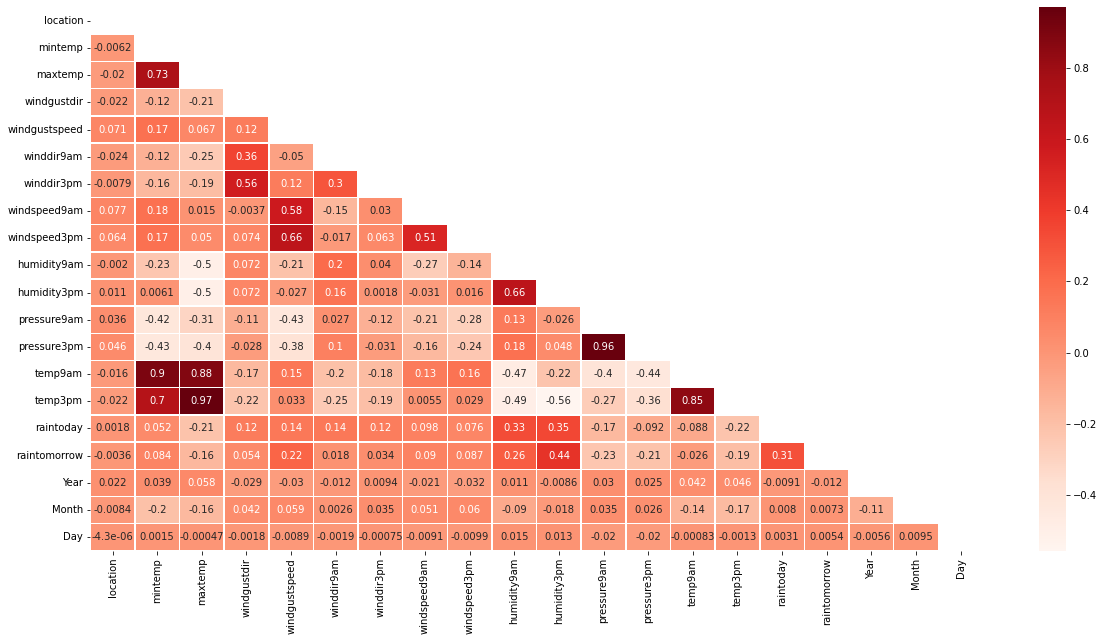

In [15]:
#filling the catagorical columns with the model values where needed
mode_values=df[cat_col].mode()
df[cat_col] = df[cat_col].fillna(value=mode_values)

df.isnull().sum()

fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

df=df.drop(columns=['temp9am','temp3pm','pressure9am'],axis=1)

df = df

In [16]:
#selecting the dependent and independent feature
X = df.drop(['raintomorrow'], axis = 1)

In [17]:
#selecting the dependent feature which is to be predicted in terms of the classification
y = df['raintomorrow']

In [18]:
#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

logreg = LogisticRegression(solver='liblinear', random_state = 0)


logreg.fit(X_train, y_train)


y_pred_test = logreg.predict(X_test)

In [19]:
#evaluation in terms of the model accuracy
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 83.74%


In [20]:
#confusion matrix evalauation
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

[[31289  1812]
 [ 5125  4432]]


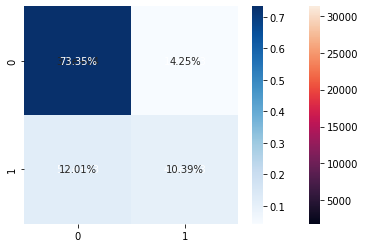

In [21]:
sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')